<center>MACHINE LEARNING AVEC R

>Chargement des librairies nécessaires

In [1]:
if (require("parallel")==FALSE) install.packages("parallel")## Parallélisation : travailler sur tous les coeurs de votre PC
if (require("doSNOW")==FALSE) install.packages("doSNOW")
if (require("caret")==FALSE) install.packages("caret")
if (require("C50")==FALSE) install.packages("C50")
if (require("ade4")==FALSE) install.packages("ade4")
if (require("ggplot2")==FALSE) install.packages("ggplot2")
if (require("glmnet")==FALSE) install.packages("glmnet")
if (require("pROC")==FALSE) install.packages("pROC")
if (require("ROCR")==FALSE) install.packages("ROCR")
if (require("rpart")==FALSE) install.packages("rpart")
if (require("rpart.plot")==FALSE) install.packages("rpart.plot")
if (require("nnet")==FALSE) install.packages("nnet")

Loading required package: parallel

Loading required package: doSNOW

Warning message:
"package 'doSNOW' was built under R version 3.5.3"
Loading required package: foreach

Loading required package: iterators

Loading required package: snow


Attaching package: 'snow'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, clusterSplit, makeCluster, parApply,
    parCapply, parLapply, parRapply, parSapply, splitIndices,
    stopCluster


Loading required package: caret

Warning message:
"package 'caret' was built under R version 3.5.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 3.5.3"
Loading required package: ggplot2

Loading required package: C50

Warning message:
"package 'C50' was built under R version 3.5.3"
Loading required package: ade4

Warning message:
"package 'ade4' was built under R version 3.5.3"
Loading required package: gl

In [2]:
library(parallel)
library(doSNOW)
library(caret)
library(C50)
library(ade4)
library(ggplot2)
library(glmnet)
library(pROC)
library(ROCR)
library(rpart)
library(rpart.plot)
library(nnet)

>Parallélisation des traitements

### Pour réduire les temps de traitements longs, il existe plusieurs solutions quand on utilise R. Nous utiliserons un moyen simple d'augmenter significativement la vitesse des calculs en parallélisant les traitements sur plusieurs coeurs (si la machine en possède) et quand les tâches qui doivent être exécutées sont indépendentes les unes des autres.  Nous utiliserons si besoin la librairie "parallel".
### Pour plus de détail : https://stat.ethz.ch/R-manual/R-patched/library/parallel/doc/parallel.pdf

In [ ]:
detectCores() # détecter le nombre de coeurs du PC
detectCores(logical = FALSE) # détecter le nombre de coeurs logiques du PC
cl <- makeCluster(4)
registerDoSNOW(cl) # Parallélisation

>Cas pratiques sur des jeux de données (utilisation des algorithmes de ML)

>><font color='green'>Chargement des données à utiliser</font>

In [3]:
credit <- read.csv("D:/Programmation/Mes cours/SIMPLON/Différentes prez Formateur/Promo IA Nancy/R/Data/credit.csv", sep = ',', header=TRUE)
# credit1 <- read.csv("D:/Programmation/Mes cours/SIMPLON/Différentes prez Formateur/Promo IA Nancy/R/Data/credit3.csv", sep = ',', header=TRUE)
credit <-credit[,-c(1,22)]
# credit1 <-credit1[,-c(1,22)]
credit

Comptes,Duree_credit,Historique_credit,Objet_credit,Montant_credit,Epargne,Anciennete_emploi,Taux_effort,Situation_familiale,Garanties,Anciennete_domicile,Biens,Age,Autres_credits,Statut_domicile,Nb_credits,Type_emploi,Nb_pers_charge,Telephone,Cible
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>
1,6,A34,A43,1169,0,5,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,0
2,48,A32,A43,5951,1,3,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,1
4,12,A34,A46,2096,1,4,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,0
1,42,A32,A42,7882,1,4,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,0
1,24,A33,A40,4870,1,3,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,1
4,36,A32,A46,9055,0,3,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,0
4,24,A32,A42,2835,3,5,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,0
2,36,A32,A41,6948,1,3,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,0
4,12,A32,A43,3059,4,4,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,0


In [4]:
# Création du train et test set
set.seed(2)
p <- createDataPartition(y=credit$Cible, p=70/100, list=FALSE)
train <- credit[p,]
test <- credit[-p,]

# Création du train et test set
# set.seed(2)
# p <- createDataPartition(y=credit1$Cible, p=70/100, list=FALSE)
# train_ <- credit1[p,]
# test_ <- credit1[-p,]

>><font color='green'>Régression linéaire</font>

In [5]:
lm <- lm(Cible~., data=train)
summary(lm)


Call:
lm(formula = Cible ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92726 -0.28002 -0.08971  0.30351  0.99646 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.332e-01  1.981e-01   3.197 0.001457 ** 
Comptes                -8.764e-02  1.296e-02  -6.760 3.04e-11 ***
Duree_credit            5.794e-03  1.726e-03   3.356 0.000835 ***
Historique_creditA31   -2.417e-02  1.104e-01  -0.219 0.826753    
Historique_creditA32   -1.756e-01  8.715e-02  -2.014 0.044376 *  
Historique_creditA33   -2.917e-01  9.520e-02  -3.064 0.002274 ** 
Historique_creditA34   -3.109e-01  8.757e-02  -3.550 0.000413 ***
Objet_creditA41        -2.490e-01  6.145e-02  -4.052 5.68e-05 ***
Objet_creditA410       -2.452e-01  1.587e-01  -1.545 0.122887    
Objet_creditA42        -1.135e-01  4.967e-02  -2.285 0.022617 *  
Objet_creditA43        -9.222e-02  4.453e-02  -2.071 0.038744 *  
Objet_creditA44        -1.124e-01  1.488e-01

>><font color='green'>Régression logistique</font>

### 1er modèle

In [7]:
logit <- glm(Cible~.,data=train,family=binomial(link = "logit"))
summary(logit)
logit$coefficients


Call:
glm(formula = Cible ~ ., family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3779  -0.7054  -0.3978   0.7252   2.5150  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             6.967e-01  1.212e+00   0.575 0.565421    
Comptes                -5.372e-01  8.518e-02  -6.307 2.84e-10 ***
Duree_credit            3.384e-02  1.056e-02   3.203 0.001361 ** 
Historique_creditA31   -7.473e-02  6.497e-01  -0.115 0.908432    
Historique_creditA32   -7.561e-01  5.169e-01  -1.463 0.143523    
Historique_creditA33   -1.473e+00  5.736e-01  -2.567 0.010246 *  
Historique_creditA34   -1.685e+00  5.277e-01  -3.193 0.001406 ** 
Objet_creditA41        -1.704e+00  4.545e-01  -3.748 0.000178 ***
Objet_creditA410       -1.471e+00  1.000e+00  -1.471 0.141389    
Objet_creditA42        -7.478e-01  3.108e-01  -2.406 0.016116 *  
Objet_creditA43        -5.865e-01  2.844e-01  -2.063 0.039153 * 

(Intercept)                Comptes           Duree_credit 
          0.6967394170          -0.5372386920           0.0338359856 
  Historique_creditA31   Historique_creditA32   Historique_creditA33 
         -0.0747311250          -0.7561371853          -1.4725674570 
  Historique_creditA34        Objet_creditA41       Objet_creditA410 
         -1.6852010024          -1.7035032414          -1.4707635213 
       Objet_creditA42        Objet_creditA43        Objet_creditA44 
         -0.7477944219          -0.5865231795          -1.0437679162 
       Objet_creditA45        Objet_creditA46        Objet_creditA48 
         -0.1910519158           0.0755971335          -1.3771204025 
       Objet_creditA49         Montant_credit                Epargne 
         -0.5812424268           0.0001329739           0.0168818319 
     Anciennete_emploi            Taux_effort Situation_familialeA92 
         -0.1572841408           0.3702173798          -0.4969742263 
Situation_familialeA93 Situation_familialeA94          GarantiesA102 
         -1.1375329590          -1.0842528293           0.8691618933 
         GarantiesA103    Anciennete_domicile              BiensA122 
         -1.1653072944          -0.0060706664           0.2570454377 
             BiensA123              BiensA124                    Age 
          0.1414979086           0.4547632522          -0.0210508221 
    Autres_creditsA142     Autres_creditsA143    Statut_domicileA152 
         -0.4052640064          -0.6321413701          -0.3121081328 
   Statut_domicileA153             Nb_credits        Type_emploiA172 
         -0.1129345373           0.5053336441           0.6048821069 
       Type_emploiA173        Type_emploiA174         Nb_pers_charge 
          0.4867547089           0.8081516836           0.4505465109 
         TelephoneA192 
         -0.3994431768

In [8]:
# recherche maximale
selection <- step(logit, direction="backward",trace=TRUE, k = log(nrow(train)))

Start:  AIC=902.56
Cible ~ Comptes + Duree_credit + Historique_credit + Objet_credit + 
    Montant_credit + Epargne + Anciennete_emploi + Taux_effort + 
    Situation_familiale + Garanties + Anciennete_domicile + Biens + 
    Age + Autres_credits + Statut_domicile + Nb_credits + Type_emploi + 
    Nb_pers_charge + Telephone

                      Df Deviance    AIC
- Objet_credit         9   662.78 865.86
- Biens                3   641.80 884.19
- Type_emploi          3   642.32 884.71
- Statut_domicile      2   641.80 890.74
- Situation_familiale  3   651.55 893.94
- Autres_credits       2   645.71 894.65
- Anciennete_domicile  1   640.52 896.01
- Epargne              1   640.53 896.03
- Historique_credit    4   661.17 897.01
- Nb_pers_charge       1   642.85 898.34
- Telephone            1   643.23 898.72
- Garanties            2   649.80 898.74
- Anciennete_emploi    1   643.26 898.75
- Age                  1   644.42 899.91
- Nb_credits           1   645.64 901.14
<none>          

#### 2ème modèle

In [9]:
# Reprise de la régression logistique et interprétation des résultats
logit <- glm(Cible ~ Comptes + Duree_credit + Anciennete_emploi + Taux_effort, data=train,family=binomial(link = "logit"))
summary(logit)
logit$coefficients
OR = as.data.frame(exp(logit$coefficients))
OR["%"] <- (exp(logit$coefficients) -1)*100
OR


Call:
glm(formula = Cible ~ Comptes + Duree_credit + Anciennete_emploi + 
    Taux_effort, family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9182  -0.8126  -0.5220   0.9538   2.3256  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.25130    0.40000  -0.628  0.52984    
Comptes           -0.60879    0.07677  -7.930 2.18e-15 ***
Duree_credit       0.04482    0.00742   6.041 1.54e-09 ***
Anciennete_emploi -0.23943    0.07647  -3.131  0.00174 ** 
Taux_effort        0.22089    0.08363   2.641  0.00826 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 861.88  on 699  degrees of freedom
Residual deviance: 732.09  on 695  degrees of freedom
AIC: 742.09

Number of Fisher Scoring iterations: 4


(Intercept)           Comptes      Duree_credit Anciennete_emploi 
      -0.25129947       -0.60879344        0.04482334       -0.23942938 
      Taux_effort 
       0.22089346

,exp(logit$coefficients),%
,<dbl>,<dbl>
(Intercept),0.7777894,-22.221058
Comptes,0.5440068,-45.599315
Duree_credit,1.0458431,4.584308
Anciennete_emploi,0.7870769,-21.292315
Taux_effort,1.2471905,24.719054


[1] 0.7624429

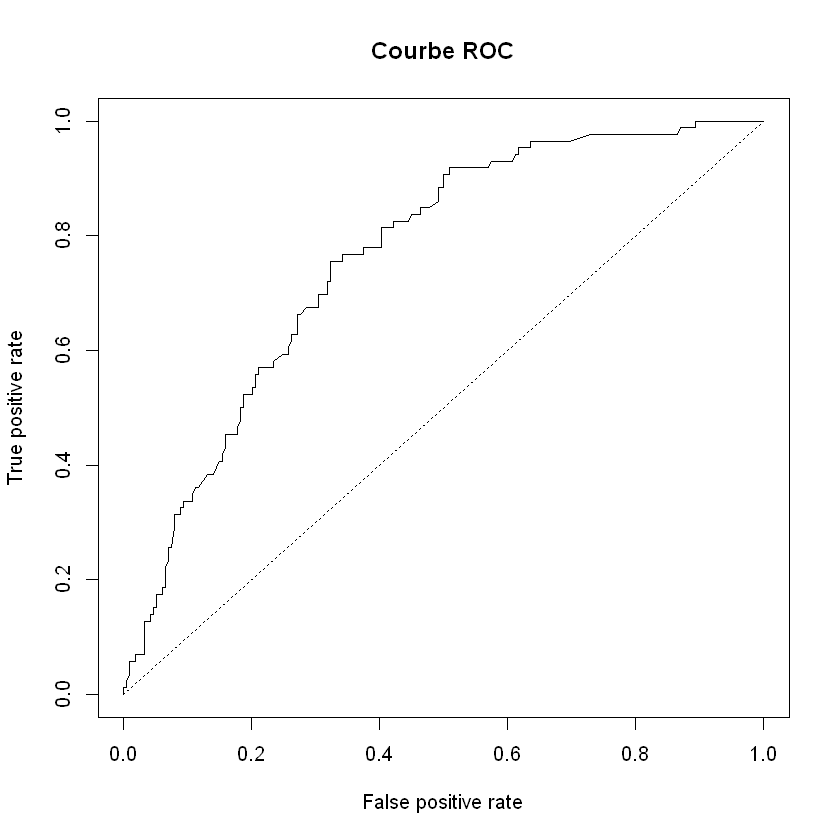

In [10]:
# aire sous la courbe ROC
library(ROCR)
pred_test <- predict(logit, newdata=test, type="response")
predTest <- prediction(pred_test,test$Cible,label.ordering=c(0,1))
performance(predTest,"auc")@y.values[[1]]

# courbe ROC
perf <- performance(predTest,"tpr","fpr")
plot(perf,main='Courbe ROC')
segments(0,0,1,1,lty=3) # ajout diagonale en pointillés 

In [23]:
credit$Cible <- as.factor(credit$Cible)
# Création du train et test set
set.seed(2)
p <- createDataPartition(y=credit$Cible, p=70/100, list=FALSE)
train <- credit[p,]
test <- credit[-p,]
# train <- downSample(x = train[, -ncol(train)],
#                          y = train$Cible)
library(DMwR)

set.seed(9560)
train <- SMOTE(Cible ~ ., data  = train)                         
table(train$Cible)

Loading required package: grid




  0   1 
840 630 

In [35]:
# Cross validation : k-fold cv
fitControl <- trainControl(method = "repeatedcv", repeats = 10, classProbs = TRUE, summaryFunction = twoClassSummary)
# Entrainement du modèle
m <- train(make.names(Cible)~., data = train, method = "glm", trControl = fitControl, metric = "ROC", tuneLength = 7)
# Prédiction
pred <- predict(m, newdata = test)
pred = as.factor(ifelse(pred == 'X0',0,1))
# Récupération des probabilités
mProbs <- predict(m, newdata = test, type = "prob")
# Matrice de confusion
MC = confusionMatrix(data = pred, test$Cible)
mc<-table(as.factor(test$Cible),pred)
mc
#Taux de prédiction
prediction=mc[2,2]/sum(mc[2,])
print(prediction)

   pred
      0   1
  0 157  53
  1  33  57

[1] 0.6333333


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7859

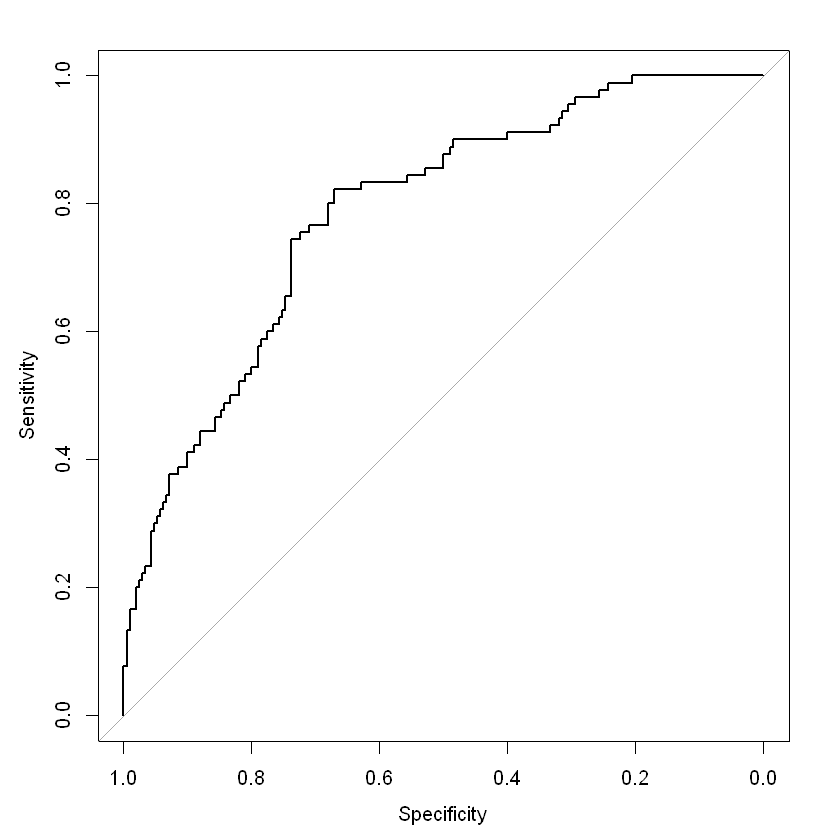

In [36]:
# courbe ROC
pred.m <- as.vector(mProbs)[,"X1"]
roc.m <- pROC::roc(test$Cible, pred.m)
auc <- pROC::auc(roc.m)
auc
plot(roc.m)

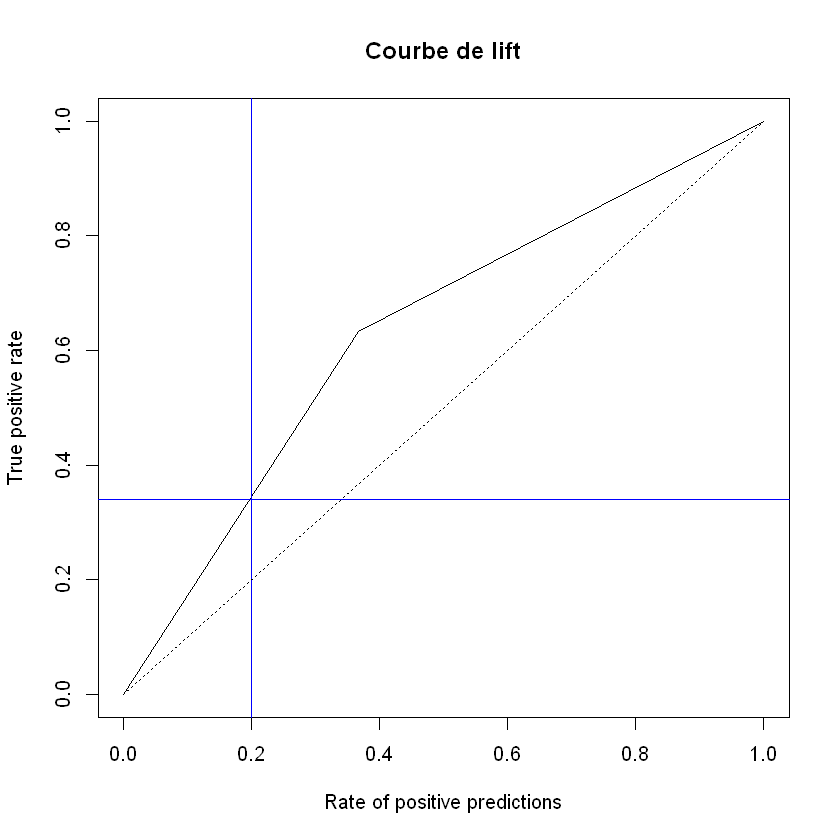

In [38]:
library(ROCR)
pred_test <- predict(m, newdata=test, type="raw")
pred_test = ifelse(pred_test == 'X0',0,1)
predTest <- prediction(pred_test,test$Cible,label.ordering=c(0,1))
# perf <- performance(predTest,"tpr","fpr")
# plot(perf,main='Courbe ROC')
# segments(0,0,1,1,lty=3) # ajout diagonale en pointillés 
# courbe de lift
lift <- performance(predTest,"tpr","rpp")# rpp = (TP + FP) / (TP + FP +TN +FN)
plot(lift,main='Courbe de lift')
abline(v=0.2, col="blue", lty=c(1,2))
abline(h=0.34, col="blue", lty=c(1,2))
segments(0,0,1,1,lty=3) # ajout diagonale en pointillés 

#### Interprétation d'un point de vue markéting : On touche 34% de mauvais dossiers (potentiels crédits refusés) en touchant 20% des clients; ce qui n'est pas intéressant sur un plan financier pour l'entreprise

>><font color='green'>Arbres de décision</font>

#### rpart

In [39]:
# Cross validation : k-fold cv
fitControl <- trainControl(method = "repeatedcv", repeats = 20, number = 15, classProbs = TRUE, summaryFunction = twoClassSummary)
# Entrainement du modèle
m <- train(make.names(Cible)~., data = train, method = "rpart", trControl = fitControl, metric = "ROC", tuneLength = 3)
# Courbe des AUC
# plot(m)
# Prédiction
pred <- predict(m, newdata = test)
pred = as.factor(ifelse(pred == 'X0',0,1))
# Récupération des probabilités
mProbs <- predict(m, newdata = test, type = "prob")
# Matrice de confusion
MC <- confusionMatrix(data = pred, as.factor(test$Cible))
mc<-table(as.factor(test$Cible),pred)
mc
#Taux de prédiction
prediction=mc[2,2]/sum(mc[2,])
print(prediction)

   pred
      0   1
  0 151  59
  1  34  56

[1] 0.6222222


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7197

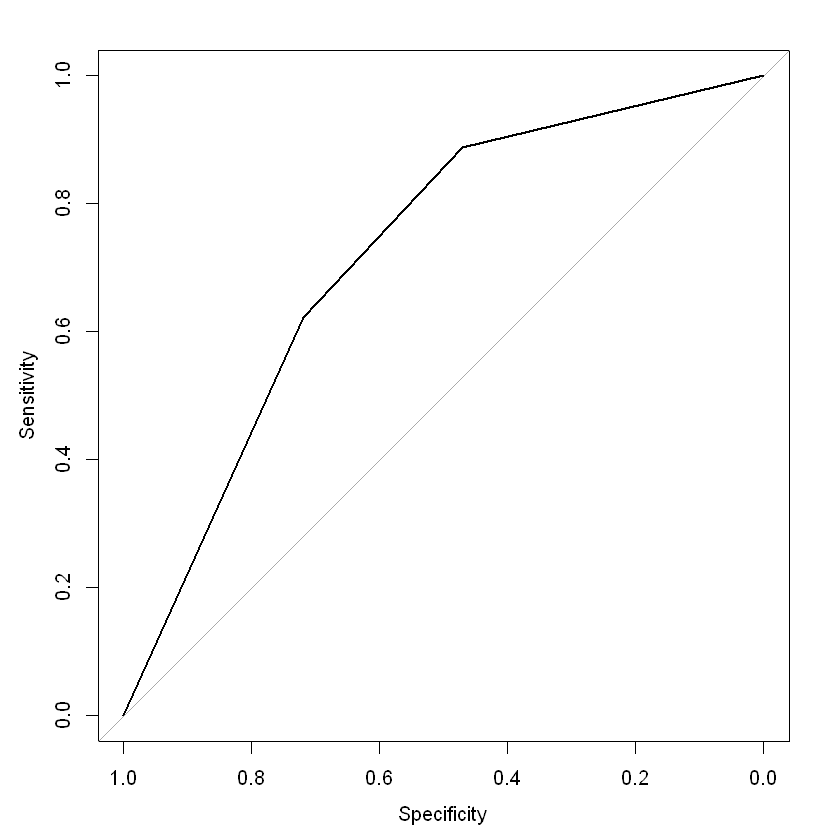

In [40]:
pred.m <- as.vector(mProbs)[,"X1"]
roc.m <- pROC::roc(test$Cible, pred.m)
auc <- pROC::auc(roc.m)
auc
plot(roc.m)

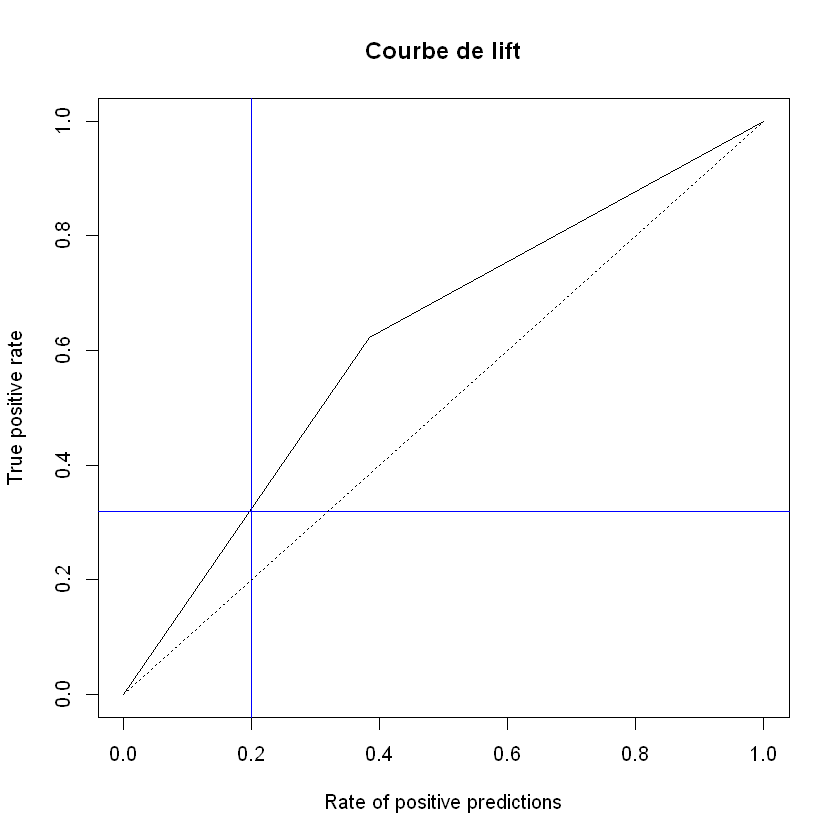

In [42]:
library(ROCR)
pred_test <- predict(m, newdata=test, type="raw")
pred_test = ifelse(pred_test == 'X0',0,1)
predTest <- prediction(pred_test,test$Cible,label.ordering=c(0,1))
# perf <- performance(predTest,"tpr","fpr")
# plot(perf,main='Courbe ROC')
# segments(0,0,1,1,lty=3) # ajout diagonale en pointillés 
# courbe de lift
lift <- performance(predTest,"tpr","rpp")
plot(lift,main='Courbe de lift')
abline(v=0.2, col="blue", lty=c(1,2))
abline(h=0.32, col="blue", lty=c(1,2))
segments(0,0,1,1,lty=3) # ajout diagonale en pointillés 

#### Interprétation d'un point de vue markéting : On touche 32% de mauvais dossiers (potentiels crédits refusés) en touchant 20% des clients; ce qui n'est pas intéressant sur un plan financier pour l'entreprise

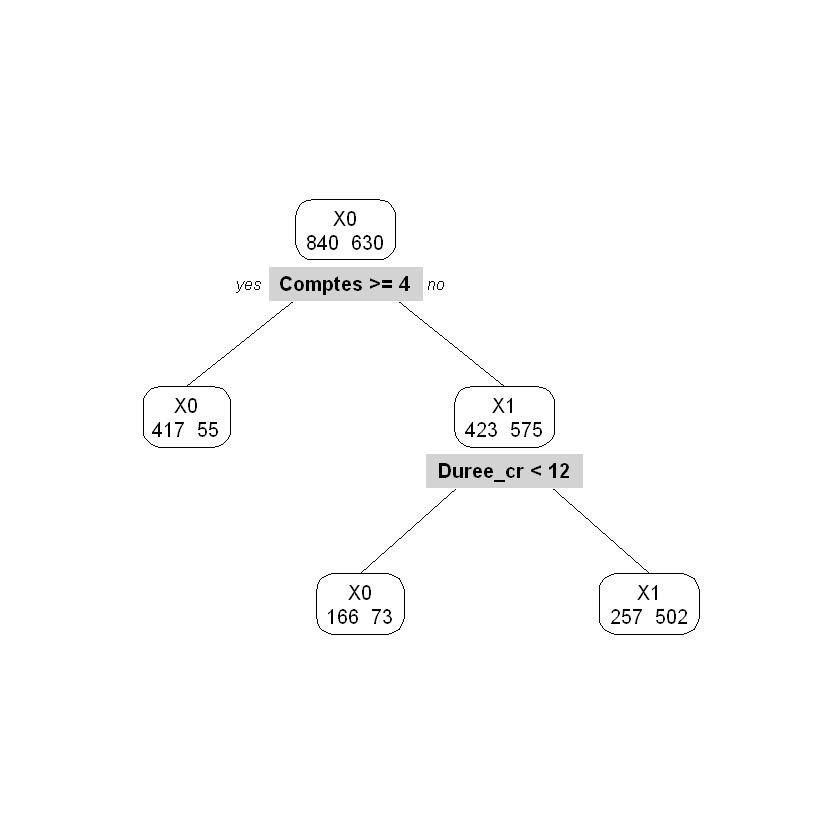

In [43]:
# utilisation de la fonction "prune" pour l'élagage
prunedcart <- prune(m$finalModel,cp=m$bestTune$cp)
prp(prunedcart,type=2,extra=1,split.box.col="lightgray")

#### Interprétation
> Partir de la gauche vers la droite
> Si condition remplie alors "gauche" sinon "droite"

#### Concrêtement dans ce cas

> Si le client a sur son compte au moins 4 000 €, la probabilité d'avoir un crédit est élevée
> Si le client a sur son compte moins de 4000 €, la probabilité d'avoir un refus de crédit est élevée mais s'il demande une durée de crédit inférieur à 12 moins, la probabilité d'avoir le crédit est élevée 


In [44]:
# https://cran.r-project.org/web/packages/varImp/varImp.pdf
vimp = varImp(object = m, measure = "multiclass.Brier")
vimp

rpart variable importance

  only 20 most important variables shown (out of 39)

                       Overall
Comptes                 100.00
Duree_credit             78.91
Historique_creditA31     47.20
Montant_credit           43.58
Statut_domicileA152      26.43
Nb_credits               21.20
Taux_effort              18.32
BiensA124                 0.00
Historique_creditA33      0.00
Anciennete_domicile       0.00
Situation_familialeA93    0.00
Autres_creditsA143        0.00
Historique_creditA34      0.00
TelephoneA192             0.00
Objet_creditA46           0.00
Objet_creditA49           0.00
Type_emploiA172           0.00
Age                       0.00
Nb_pers_charge            0.00
Objet_creditA41           0.00

>><font color='green'>Classification Ascendante Hiérachique(CAH) et kmeans</font>

> Un très bon article répond à ce sujet : http://eric.univ-lyon2.fr/~ricco/cours/didacticiels/R/cah_kmeans_avec_r.pdf